#Importing the libraries

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import cv2




#USING the cv2.kmeans function directly for image segmentation

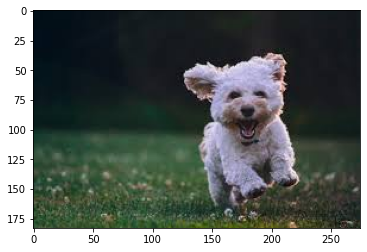

In [76]:
%matplotlib inline

image = cv2.imread('/content/dog_test_img_Segm.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

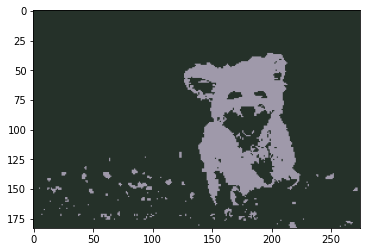

In [93]:

criteria = (
    cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 150, 0.9
            )
#we set the max iterations to 150
#the epsilon value is 0.9
k_clusters = 2

x, y, c = cv2.kmeans(np.float32(image.reshape((-1,3))), 
                     k_clusters, None, 
                     criteria, 10, 
                     cv2.KMEANS_RANDOM_CENTERS)
#using the inbiult function cv2.kmeans above
# convert data into 8-bit values
tnec = np.uint8(c)

image_centered = tnec[y.flatten()]
 
# reshape data into the original image dimensions
final_image = image_centered.reshape((image.shape))
 
plt.imshow(final_image)

#Implementing K-Means from scratch on the numpy array of pixels

In [119]:
data_image = cv2.imread("/content/dog_test_img_Segm.jpg")/255
data_image = cv2.cvtColor(data_image.astype(np.float32), cv2.COLOR_BGR2RGB)

In [120]:
import pandas as pd


In [121]:
from tqdm import tqdm

#k_clusters = 2

In [145]:
from pandas._libs.index import Int16Engine
from pandas.core.dtypes.common import is_1d_only_ea_obj
image_reshaped=data_image.reshape((-1,3))
#treating image as a dataframe
img_df = pd.DataFrame(image_reshaped)
img_df.rename(columns={0:'Red', 1:'Green', 2: 'Blue'}, inplace =True)

k_clusters = 2
diff = 1
check=0
img_df
X = img_df

In [146]:
print(X)

            Red     Green      Blue
0      0.003922  0.054902  0.086275
1      0.003922  0.054902  0.086275
2      0.003922  0.054902  0.086275
3      0.003922  0.054902  0.086275
4      0.003922  0.054902  0.086275
...         ...       ...       ...
50320  0.141176  0.152941  0.109804
50321  0.074510  0.098039  0.050980
50322  0.250980  0.298039  0.243137
50323  0.145098  0.200000  0.141176
50324  0.090196  0.145098  0.086275

[50325 rows x 3 columns]


#Starting the while loop till the centroids are found

In [147]:

while(abs(diff)>0.05):
    X_data=X
    i=1
    #iterate over each centroid point
    centroids = (X.sample(n = k_clusters))
    for i1,row_lev_cent in centroids.iterrows():
        error_dist=[]
        print("distance between=")
        for i2,row_lev_dist in tqdm(X_data.iterrows()):
            distn=np.sqrt(((row_lev_cent["Red"]-row_lev_dist["Red"])**2)
            +((row_lev_cent["Green"]-row_lev_dist["Green"])**2)
            +((row_lev_cent["Blue"]-row_lev_dist["Blue"])**2))
            error_dist.append(distn)
        X[i]=error_dist
        i+=1

    C_clust=[]
    print("reaching the centroid")
    for ind,row_iter in tqdm(X.iterrows()):
        lowest_distance=row_iter[1]
        position_index=1
        for i in range(k_clusters):
            m=i+1
            if row_iter[m] < lowest_distance:
                lowest_distance = row_iter[m]
                position_index=m
        C_clust.append(position_index)
    X["Cluster_positions"]=C_clust
    centroids_new = X.groupby(["Cluster_positions"]).mean()[["Red","Green", "Blue"]]
    if check == 0:
        diff=1
        check=check+1
    else:
        #check if there is a difference between old and new centroids
        diff = (centroids_new['Red'] - centroids['Red']).sum() 
        + (centroids_new['Green'] - centroids['Green']).sum() 
        + (centroids_new['Blue'] - centroids['Blue']).sum()
        print("Difference betwn old and NEW : ",diff.sum())
    centroids = X.groupby(["Cluster_positions"]).mean()[["Red","Green","Blue"]]

distance between=


50325it [00:04, 11414.02it/s]


distance between=


50325it [00:04, 11862.51it/s]


reaching the centroid


50325it [00:03, 16313.81it/s]


distance between=


50325it [00:03, 13565.84it/s]


distance between=


50325it [00:03, 13659.16it/s]


reaching the centroid


50325it [00:02, 16833.60it/s]

Difference betwn old and NEW :  0.0


In [148]:
centroids

,Red,Green,Blue
Cluster_positions,,,
1,0.160438,0.203093,0.172636
2,0.680015,0.651776,0.742551


In [149]:
centroids = centroids.to_numpy()

In [150]:
centroids

array([[0.1604377 , 0.20309347, 0.17263605],
       [0.68001515, 0.65177613, 0.7425511 ]], dtype=float32)

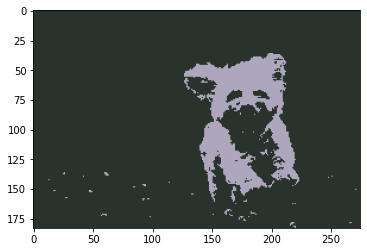

In [151]:
data_image = cv2.cvtColor(data_image.astype(np.float32), cv2.COLOR_BGR2RGB)
labels = X["Cluster_positions"].to_numpy()

#overwritting the pixels values
image_centered = centroids[labels-1]
final_image = image_centered.reshape(data_image.shape)

#plotting the image
plt.imshow(final_image)

# k_clusters = 3

In [142]:
from pandas._libs.index import Int16Engine
from pandas.core.dtypes.common import is_1d_only_ea_obj
image_reshaped=data_image.reshape((-1,3))
#treating image as a dataframe
img_df = pd.DataFrame(image_reshaped)
img_df.rename(columns={0:'Red', 1:'Green', 2: 'Blue'}, inplace =True)

k_clusters = 3
diff = 1
check=0
img_df
X = img_df

In [143]:
print(X)

            Red     Green      Blue
0      0.003922  0.054902  0.086275
1      0.003922  0.054902  0.086275
2      0.003922  0.054902  0.086275
3      0.003922  0.054902  0.086275
4      0.003922  0.054902  0.086275
...         ...       ...       ...
50320  0.141176  0.152941  0.109804
50321  0.074510  0.098039  0.050980
50322  0.250980  0.298039  0.243137
50323  0.145098  0.200000  0.141176
50324  0.090196  0.145098  0.086275

[50325 rows x 3 columns]


#Starting the while loop till the centroids are found

In [144]:

while(abs(diff)>0.05):
    X_data=X
    i=1
    #iterate over each centroid point
    centroids = (X.sample(n = k_clusters))
    for i1,row_lev_cent in centroids.iterrows():
        error_dist=[]
        print("distance between=")
        for i2,row_lev_dist in tqdm(X_data.iterrows()):
            distn=np.sqrt(((row_lev_cent["Red"]-row_lev_dist["Red"])**2)
            +((row_lev_cent["Green"]-row_lev_dist["Green"])**2)
            +((row_lev_cent["Blue"]-row_lev_dist["Blue"])**2))
            error_dist.append(distn)
        X[i]=error_dist
        i+=1

    C_clust=[]
    print("reaching the centroid")
    for ind,row_iter in tqdm(X.iterrows()):
        lowest_distance=row_iter[1]
        position_index=1
        for i in range(k_clusters):
            m=i+1
            if row_iter[m] < lowest_distance:
                lowest_distance = row_iter[m]
                position_index=m
        C_clust.append(position_index)
    X["Cluster_positions"]=C_clust
    centroids_new = X.groupby(["Cluster_positions"]).mean()[["Red","Green", "Blue"]]
    if check == 0:
        diff=1
        check=check+1
    else:
        #check if there is a difference between old and new centroids
        diff = (centroids_new['Red'] - centroids['Red']).sum() 
        + (centroids_new['Green'] - centroids['Green']).sum() 
        + (centroids_new['Blue'] - centroids['Blue']).sum()
        print("Difference betwn old and NEW : ",diff.sum())
    centroids = X.groupby(["Cluster_positions"]).mean()[["Red","Green","Blue"]]

distance between=


50325it [00:04, 11487.99it/s]


distance between=


50325it [00:04, 11411.45it/s]


distance between=


50325it [00:04, 11622.61it/s]


reaching the centroid


50325it [00:03, 14456.11it/s]


distance between=


50325it [00:03, 13902.77it/s]


distance between=


50325it [00:03, 13623.85it/s]


distance between=


50325it [00:03, 13740.42it/s]


reaching the centroid


50325it [00:04, 10612.47it/s]


Difference betwn old and NEW :  0.0


In [128]:
centroids

,R,G,B
Cluster,,,
1,0.120538,0.157908,0.138349
2,0.300772,0.378278,0.290666
3,0.645273,0.617472,0.693544


In [129]:
centroids = centroids.to_numpy()

In [130]:
centroids

array([[0.12053757, 0.15790804, 0.138349  ],
       [0.30077153, 0.37827808, 0.2906661 ],
       [0.64527315, 0.617472  , 0.6935443 ]], dtype=float32)

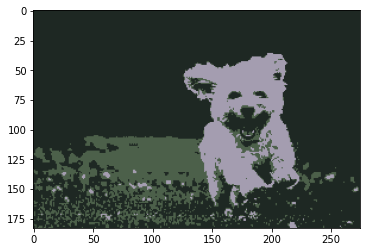

In [131]:
data_image = cv2.cvtColor(data_image.astype(np.float32), cv2.COLOR_BGR2RGB)
labels = X["Cluster_positions"].to_numpy()

#overwritting the pixels values
image_centered = centroids[labels-1]
final_image = image_centered.reshape(data_image.shape)

#plotting the image
plt.imshow(final_image)

REFERENCES:


*   https://medium.com/geekculture/implementing-k-means-clustering-with-k-means-initialization-in-python-7ca5a859d63a

*   https://www.geeksforgeeks.org/image-segmentation-using-k-means-clustering/
*   https://medium.com/analytics-vidhya/image-segmentation-using-k-means-clustering-algorithm-python-cef588a79a63


